# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [442]:
import sys

sys.path.append("..")

from imp import reload

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from helper_functions import config, data_utils, evaluation, plot, preprocessing

import pandas as pd
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

# from src import config, data_utils, evaluation, plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [443]:
reload(data_utils)

<module 'helper_functions.data_utils' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis_chris/src/notebooks/../helper_functions/data_utils.py'>

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [444]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')

In [445]:
app_normalized = preprocessing.categorical_columns(app_normalized)
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [446]:
app_normalized.drop(columns='PRODUCT', inplace=True)
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  AGE                          49935 non-null  category
 12  HAS_DEPENDANTS               49935 non-null  bool    
 13  H

### Encoding

- We do the encoding process for....

- Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [447]:
reload(preprocessing)
#app_dum = preprocessing.encoding(app_normalized, True) # True for pandas get_dummies
app_enc = preprocessing.encoding(app_normalized, False) # False for different encoder

In [448]:
# X_train_dum, y_train_dum, X_test_dum, y_test_dum, X_val_dum, y_val_dum = data_utils.get_feature(app_dum) # using get_dummies
# X_train_enc, y_train_enc, X_test_enc, y_test_enc, X_val_enc, y_val_enc = data_utils.get_feature(app_enc) # using encoder

In [449]:
# X_train_dum, y_train_dum, X_test_dum, y_test_dum, X_val_dum, y_val_dum = data_utils.get_feature(app_dum) # using get_dummies

Original dataset shape Counter({0: 25037, 1: 8918})
New dataset shape Counter({0: 25037, 1: 25037})
Best Score for Logistic Regression:  0.6043456724240581
model score for Logistic Regression: 0.574
Model Performance metrics:
------------------------------
Accuracy: 0.5723440472614398
Precision: 0.7897853441894893
Recall: 0.5765230312035661
F1 Score: 0.6665105020691808

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      7403
           1       0.32      0.56      0.40      2584

    accuracy                           0.57      9987
   macro avg       0.55      0.57      0.54      9987
weighted avg       0.67      0.57      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4268  3135
1  1136  1448


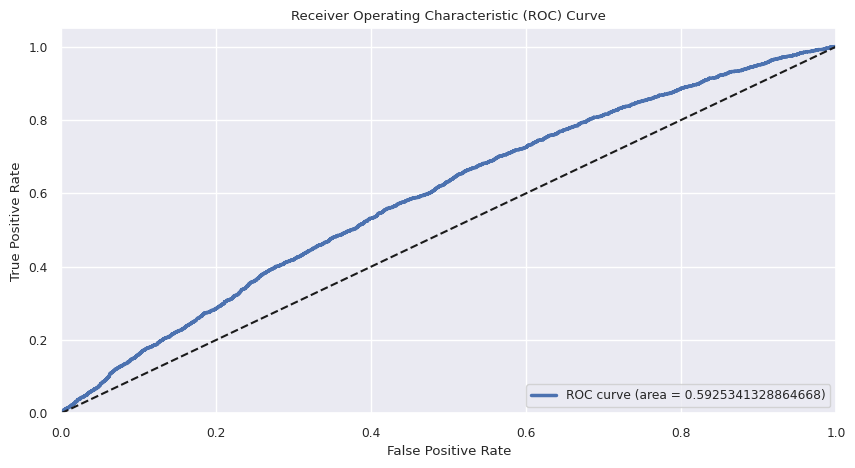

Best Score for Logistic Regression:  0.6043456724240581


In [450]:
reload(preprocessing)
lr_model = preprocessing.model_logistic_regression(app_enc, True)

In [15]:
# accuracy = evaluation.get_performance(y_hat, y_test_enc)
# evaluation.plot_roc(grid_search_enc, y_test_enc, X_test_enc)

#### DIFERENTES MODELOS GPT, SOLO USAR COMO GUIA...

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeClassifier, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [454]:
def compute_general_scores(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calculate overall precision
    precision_all = precision_score(y_test, y_pred)
    # Calculate overall recall
    recall_all = recall_score(y_test, y_pred)
    # Calculate scores
    f1_res = f1_score(y_test, y_pred)
    # summarize scores
    return precision_all, recall_all,f1_res

def compute_threshold_scores(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]

    # Calculate precision and recall for each threshold
    precision_thres, recall_thres, _ = precision_recall_curve(y_test,probs)
    fpr, tpr, _ = roc_curve(y_test,probs)
    # Calculate scores
    auc_pr = auc(recall_thres, precision_thres)
    auc_roc = auc(fpr, tpr)
    # summarize scores
    return precision_thres, recall_thres, auc_pr, fpr, tpr, auc_roc

def compute_conf_matrix(model, X_test, y_test):
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # cast df data
    cm_matrix = pd.DataFrame(
        data=cm, 
        columns=['Good', 'Bad'], 
        index=['Good', 'Bad']
    )
    return cm_matrix

In [455]:
X_train_dum_reshape = X_train_dum_reshape.astype("float")

In [456]:
y_train_dum_reshape = y_train_dum_reshape.astype("float")

In [458]:
stack_estimators = [
    ('logreg_cls', LogisticRegression()),
    ('knn_cls', KNeighborsClassifier()),
]
models = [
    # {
    #     "name": "DecTreeCls",
    #     "class": DecisionTreeClassifier(),
    #     "params":{'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    # },
    {
        "name": "LogRegCls",
        "class": LogisticRegression(max_iter=200,class_weight="balanced"),
        "params": {'C': [0.99, 0.10, 0.11,  0.111]},
    },
    {
        "name": "KNNCls",
        "class": KNeighborsClassifier(),
        "params":{},
    },
    {
        "name": "GaussNBCls",
        "class": GaussianNB(),
        "params":{},
    },
    {
        "name": "Stack",
        "class": StackingClassifier(estimators=stack_estimators, final_estimator=GaussianNB()),
        "params":{},
    },
    
    {
        "name": "RandForCls",
        "class": RandomForestClassifier(),
        "params":{},
    },
    # Gradient boosting
    {
        "name": "LGBMCls",
        "class": lgb.LGBMClassifier(verbosity=-1),
        "params":{},
    },
    {
        "name": "CatBoostCls",
        "class": CatBoostClassifier(
            iterations=2,
            depth=2,
            verbose=0),
        "params":{},
    },
    {
        "name": "XGBoostCls",
        "class": XGBClassifier(),
        "params":{},    
    },
    {
        "name": "MLPCls",
        "class": MLPClassifier(
            hidden_layer_sizes=(20,10,5,), 
            max_iter=200,    
            learning_rate='invscaling',
            learning_rate_init=0.0001,
            early_stopping=True,
            n_iter_no_change=10,
            warm_start=True),
        "params":{},
    },
]

In [459]:
# evaluate each model in turn
results = []
names = []

# ojo es precision lo que se evalua
scoring = 'precision'

for model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_results = cross_val_score(model["class"], X_train_dum_reshape.to_numpy(), y_train_dum_reshape.to_numpy().ravel(), cv=cv, scoring=scoring,n_jobs=-1)
    results.append(cv_results)
    names.append(model["name"])
    msg = "%s: %f (%f)" % (model["name"], cv_results.mean(), cv_results.std())
    print(msg)

LogRegCls: 0.580388 (0.008996)
KNNCls: 0.558113 (0.022690)
GaussNBCls: 0.554225 (0.011417)
Stack: 0.578410 (0.010108)
RandForCls: 0.549311 (0.011744)
LGBMCls: 0.570646 (0.009590)
CatBoostCls: 0.559038 (0.012304)
XGBoostCls: 0.562805 (0.009926)
MLPCls: 0.551398 (0.025748)


In [460]:
model_cv_results = pd.DataFrame(results, index=[model["name"] for model in models]).T

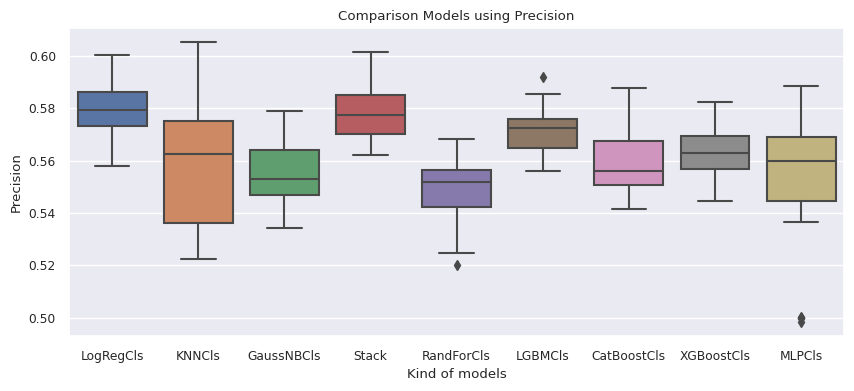

In [461]:
fig = plt.figure(figsize=(10,4))
plt.title("Comparison Models using Precision")
sns.boxplot(data=model_cv_results)
plt.xlabel("Kind of models")
plt.ylabel("Precision")
plt.show()

In [462]:

metrics = []
plot_metrics_roc = []
plot_metrics_pr = []
plot_metrics_cm = []
for model in models:
    print("Training {}".format(model["name"]))
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
    grid_search = GridSearchCV(model["class"], model["params"], cv=cv)
    grid_search.fit(X_train_dum_reshape.to_numpy(), y_train_dum_reshape.to_numpy())
    best_model = grid_search.best_estimator_
    precision_all, recall_all,f1 = compute_general_scores(best_model, X_test_dum.to_numpy(), y_test_dum.to_numpy())
    precision_thres, recall_thres, auc_pr, fpr, tpr, auc_roc = compute_threshold_scores(best_model, X_test_dum.to_numpy(), y_test_dum.to_numpy())
    conf_mat_df = compute_conf_matrix(best_model,X_test_dum.to_numpy(),y_test_dum.to_numpy())
    metrics.append((precision_all, recall_all,f1))
    plot_metrics_pr.append((precision_thres, recall_thres,auc_pr))
    plot_metrics_roc.append((fpr, tpr,auc_roc))
    plot_metrics_cm.append(conf_mat_df)

Training LogRegCls
Training KNNCls
Training GaussNBCls
Training Stack
Training RandForCls
Training LGBMCls
Training CatBoostCls
Training XGBoostCls
Training MLPCls


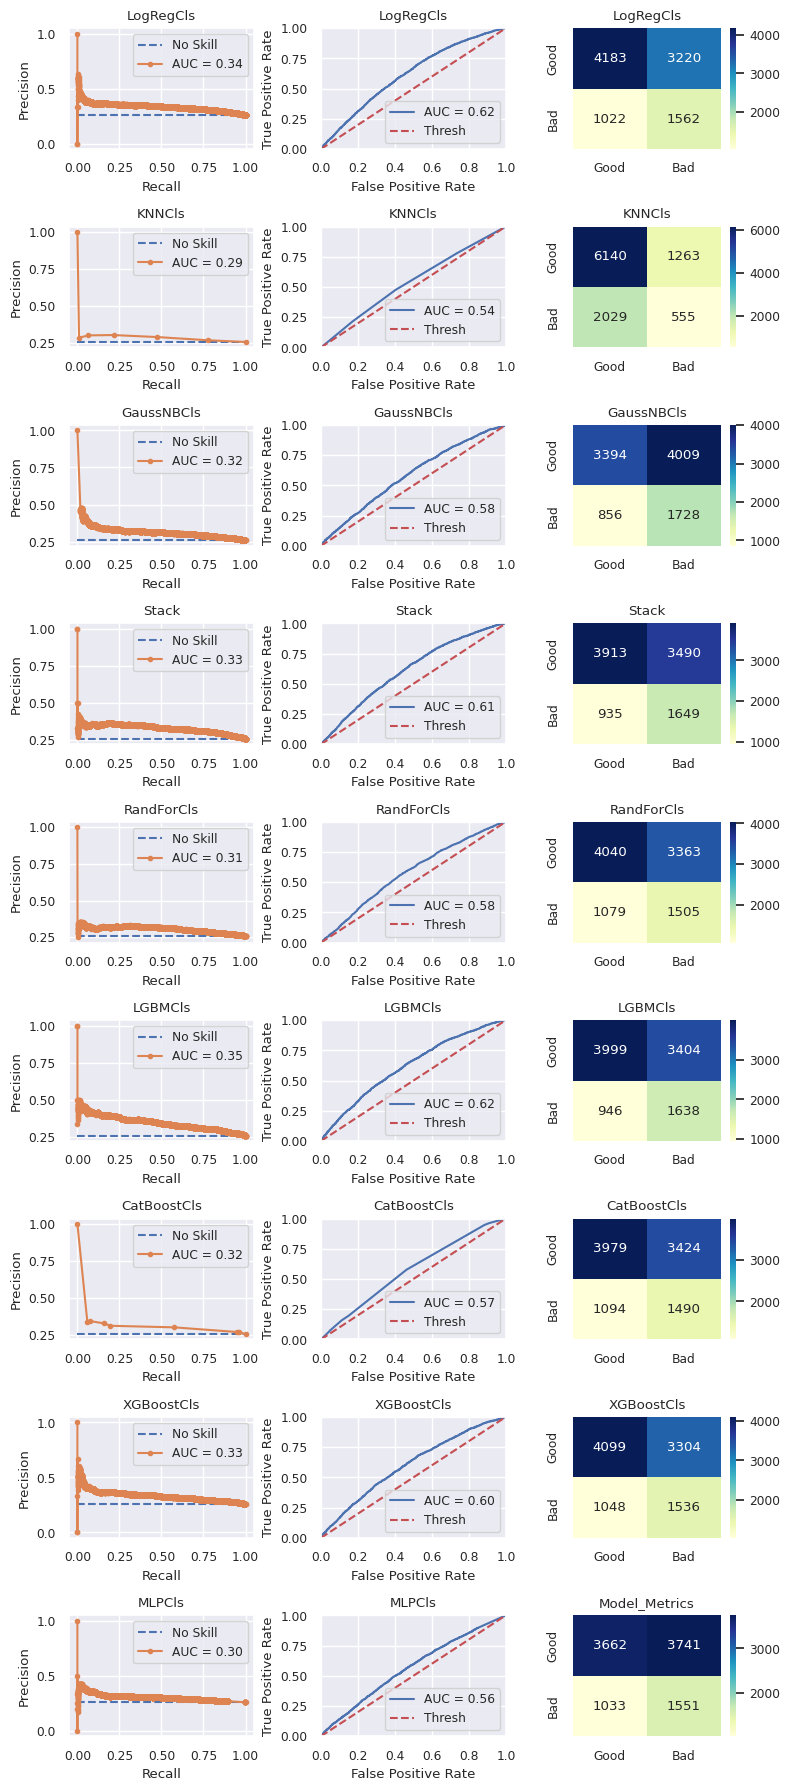

In [469]:
fig,ax = plt.subplots(9,3,figsize=(8,18))
model_names = [model["name"] for model in models]
for i,obj in enumerate(list(zip(model_names,plot_metrics_pr,plot_metrics_roc,plot_metrics_cm))):
    # get parameters from object
    model_name = obj[0]
    metric_pr = obj[1]
    metric_roc = obj[2]
    metric_cm = obj[3]
    # plot the precision-recall curves [0][0]
    no_skill = len(y_test_dum[y_test_dum==1]) / len(y_test_dum)
    ax[i][0].plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    ax[i][0].plot(metric_pr[1], metric_pr[0], marker='.', label='AUC = %0.2f' % metric_pr[2])
    ax[i][0].set_title(model_name)
    ax[i][0].set_xlabel('Recall')
    ax[i][0].set_ylabel('Precision')
    ax[i][0].legend()

    # plot the roc curves [0][1]
    ax[i][1].plot(metric_roc[0], metric_roc[1], 'b', label = 'AUC = %0.2f' % metric_roc[2])
    ax[i][1].plot([0, 1], [0, 1],'r--',label="Thresh")
    ax[i][1].set_xlim([0, 1])
    ax[i][1].set_ylim([0, 1])
    ax[i][1].set_ylabel('True Positive Rate')
    ax[i][1].set_xlabel('False Positive Rate')
    ax[i][1].set_title(model_name)
    ax[i][1].legend()

    # plot confusion matrix [0][2]
    sns.heatmap(ax=ax[i][2],data=metric_cm, annot=True, fmt='d', cmap='YlGnBu')
    ax[i][2].set_title(model_name)
plt.title("Model_Metrics")
plt.tight_layout()
plt.show()
    

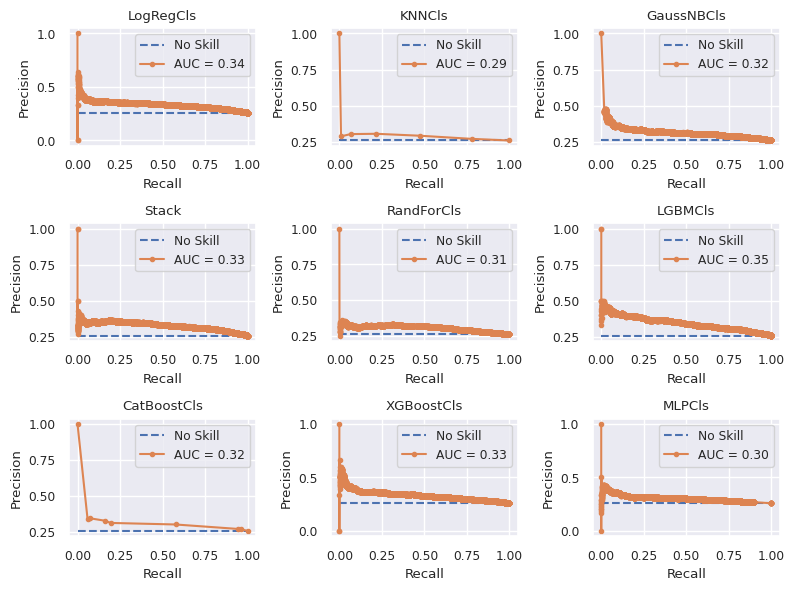

In [464]:
fig,axes = plt.subplots(3,3,figsize=(8,6))
model_names = [model["name"] for model in models]
for model_name,plot_metric,ax in zip(model_names,plot_metrics_pr,axes.ravel()):    
    # plot the roc curves
    no_skill = len(y_test_dum[y_test_dum==1]) / len(y_test_dum)
    ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    ax.plot(plot_metric[1], plot_metric[0], marker='.', label='AUC = %0.2f' % plot_metric[2])
    ax.set_title(model_name)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend()
plt.tight_layout()
plt.show()
    

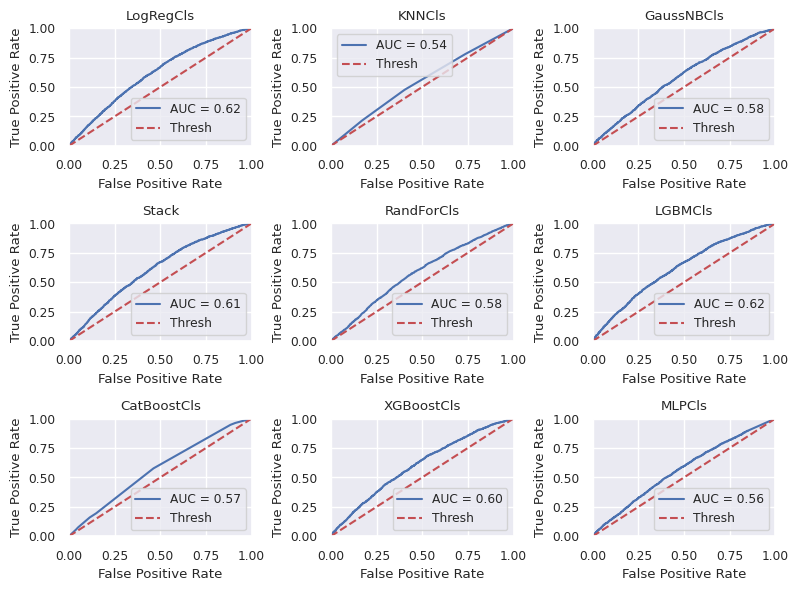

In [465]:
fig,axes = plt.subplots(3,3,figsize=(8,6))
model_names = [model["name"] for model in models]
for model_name,plot_metric,ax in zip(model_names,plot_metrics_roc,axes.ravel()):    
    # plot roc curve
    ax.plot(plot_metric[0], plot_metric[1], 'b', label = 'AUC = %0.2f' % plot_metric[2])
    ax.plot([0, 1], [0, 1],'r--',label="Thresh")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.set_title(model_name)
    ax.legend()
plt.tight_layout()
plt.show()

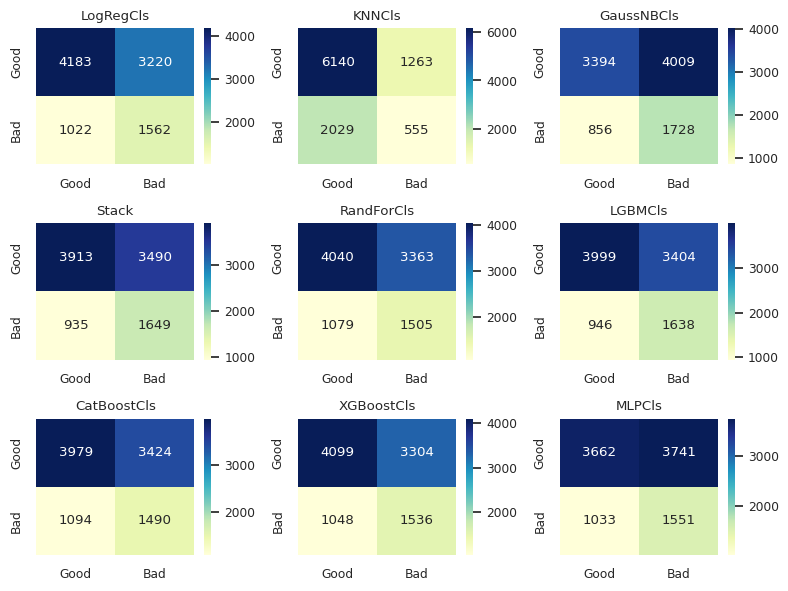

In [466]:
fig,axes = plt.subplots(3,3,figsize=(8,6))
model_names = [model["name"] for model in models]
for model_name,plot_metric,axi in zip(model_names,plot_metrics_cm,axes.ravel()):    
    # plot confusion matrix
    sns.heatmap(ax=axi,data=plot_metric, annot=True, fmt='d', cmap='YlGnBu')
    axi.set_title(model_name)
plt.tight_layout()
plt.show()

In [467]:
results = pd.DataFrame({
    'Modelo': model_names,
    'Precision': [metric[0] for metric in metrics],
    'Recall': [metric[1] for metric in metrics],
    'F1': [metric[2] for metric in metrics],
})
results

,Modelo,Precision,Recall,F1
0,LogRegCls,0.326642,0.604489,0.424111
1,KNNCls,0.305281,0.214783,0.252158
2,GaussNBCls,0.301203,0.668731,0.415335
3,Stack,0.320880,0.638158,0.427036
4,RandForCls,0.309162,0.582430,0.403918
5,LGBMCls,0.324871,0.633901,0.429583
6,CatBoostCls,0.303215,0.576625,0.397439
7,XGBoostCls,0.317355,0.594427,0.413793
8,MLPCls,0.293084,0.600232,0.393855
